In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm


In [2]:
data= pd.read_csv("data.csv")
pd.set_option('display.max_columns', None)

In [3]:
data.shape

(6819, 96)

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
data.isnull().any().any()

False

In [6]:
#all columns
for name in data:
    print(name)

Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

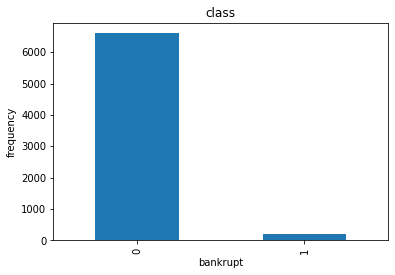

In [7]:
# Plot class balance
data["Bankrupt?"].value_counts().plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="frequency",
    title="class"

);

In [8]:
df = data[["Bankrupt?", " Net Income to Total Assets", " Interest Coverage Ratio (Interest expense to EBIT)",
         " Cash Flow to Liability", " Retained Earnings to Total Assets", " Total Asset Growth Rate", 
         " Operating Profit Rate", " Cash flow rate", " After-tax net Interest Rate", " Operating Profit Per Share (Yuan ¥)",
         " Operating Expense Rate", " Cash Flow to Sales", " Cash Reinvestment %", " Cash Flow Per Share", 
         " CFO to Assets", " Cash/Current Liability"]]

In [9]:
df.dtypes

Bankrupt?                                                int64
 Net Income to Total Assets                            float64
 Interest Coverage Ratio (Interest expense to EBIT)    float64
 Cash Flow to Liability                                float64
 Retained Earnings to Total Assets                     float64
 Total Asset Growth Rate                               float64
 Operating Profit Rate                                 float64
 Cash flow rate                                        float64
 After-tax net Interest Rate                           float64
 Operating Profit Per Share (Yuan ¥)                   float64
 Operating Expense Rate                                float64
 Cash Flow to Sales                                    float64
 Cash Reinvestment %                                   float64
 Cash Flow Per Share                                   float64
 CFO to Assets                                         float64
 Cash/Current Liability                                

array([[<AxesSubplot:title={'center':'Bankrupt?'}>,
        <AxesSubplot:title={'center':' Net Income to Total Assets'}>,
        <AxesSubplot:title={'center':' Interest Coverage Ratio (Interest expense to EBIT)'}>,
        <AxesSubplot:title={'center':' Cash Flow to Liability'}>],
       [<AxesSubplot:title={'center':' Retained Earnings to Total Assets'}>,
        <AxesSubplot:title={'center':' Total Asset Growth Rate'}>,
        <AxesSubplot:title={'center':' Operating Profit Rate'}>,
        <AxesSubplot:title={'center':' Cash flow rate'}>],
       [<AxesSubplot:title={'center':' After-tax net Interest Rate'}>,
        <AxesSubplot:title={'center':' Operating Profit Per Share (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Cash Flow to Sales'}>],
       [<AxesSubplot:title={'center':' Cash Reinvestment %'}>,
        <AxesSubplot:title={'center':' Cash Flow Per Share'}>,
        <AxesSubplot:title={'center':' CFO t

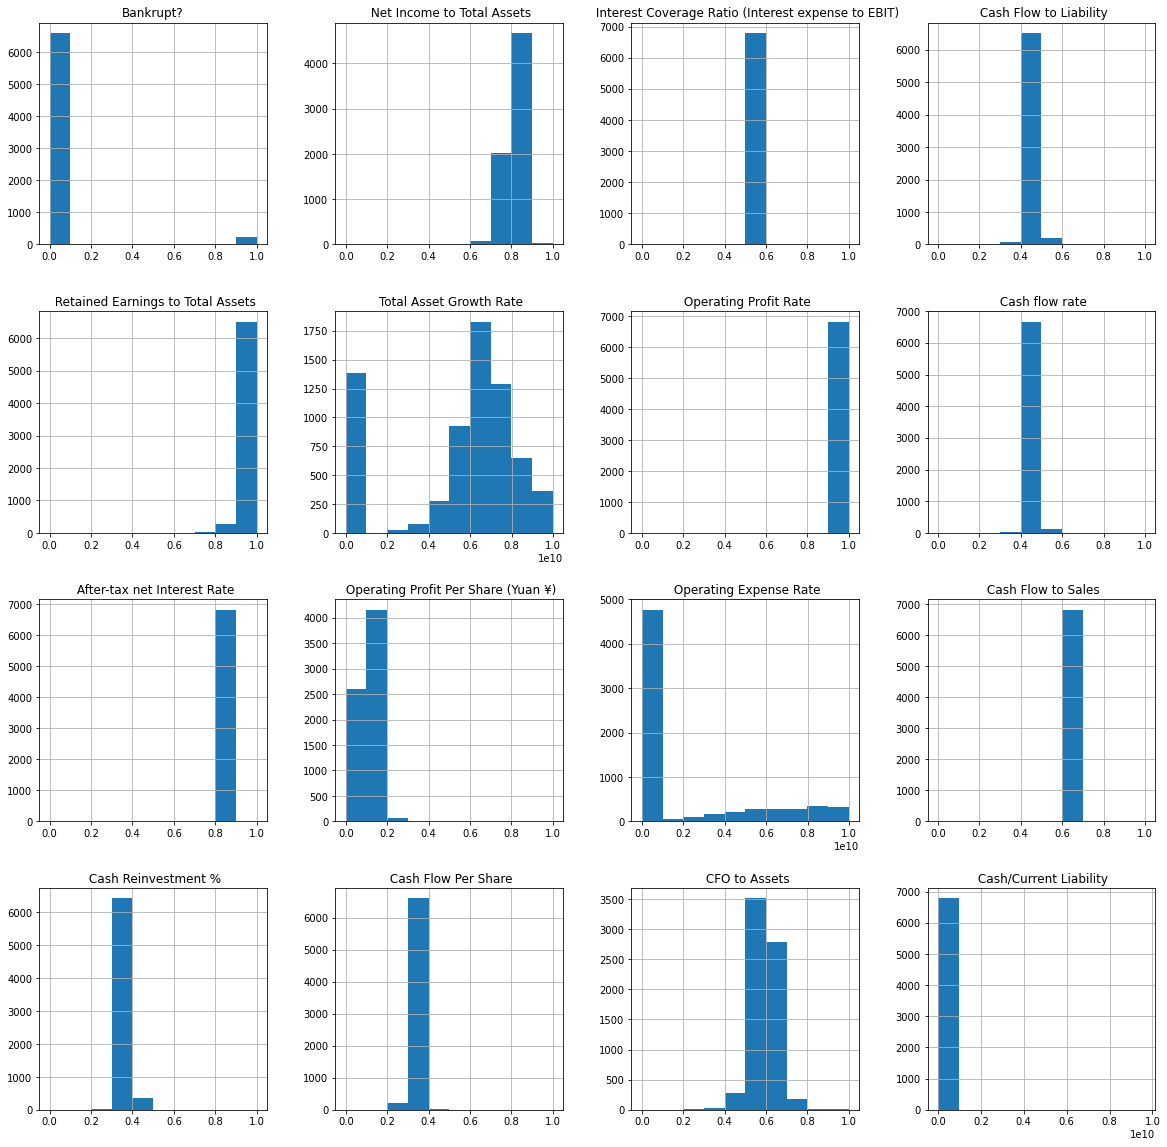

In [10]:
#distribution of all the features 
df.hist(figsize=(20,20))

construct correlation matrix to observe the strengh of relationships of each variable with bankruptcy

<AxesSubplot:>

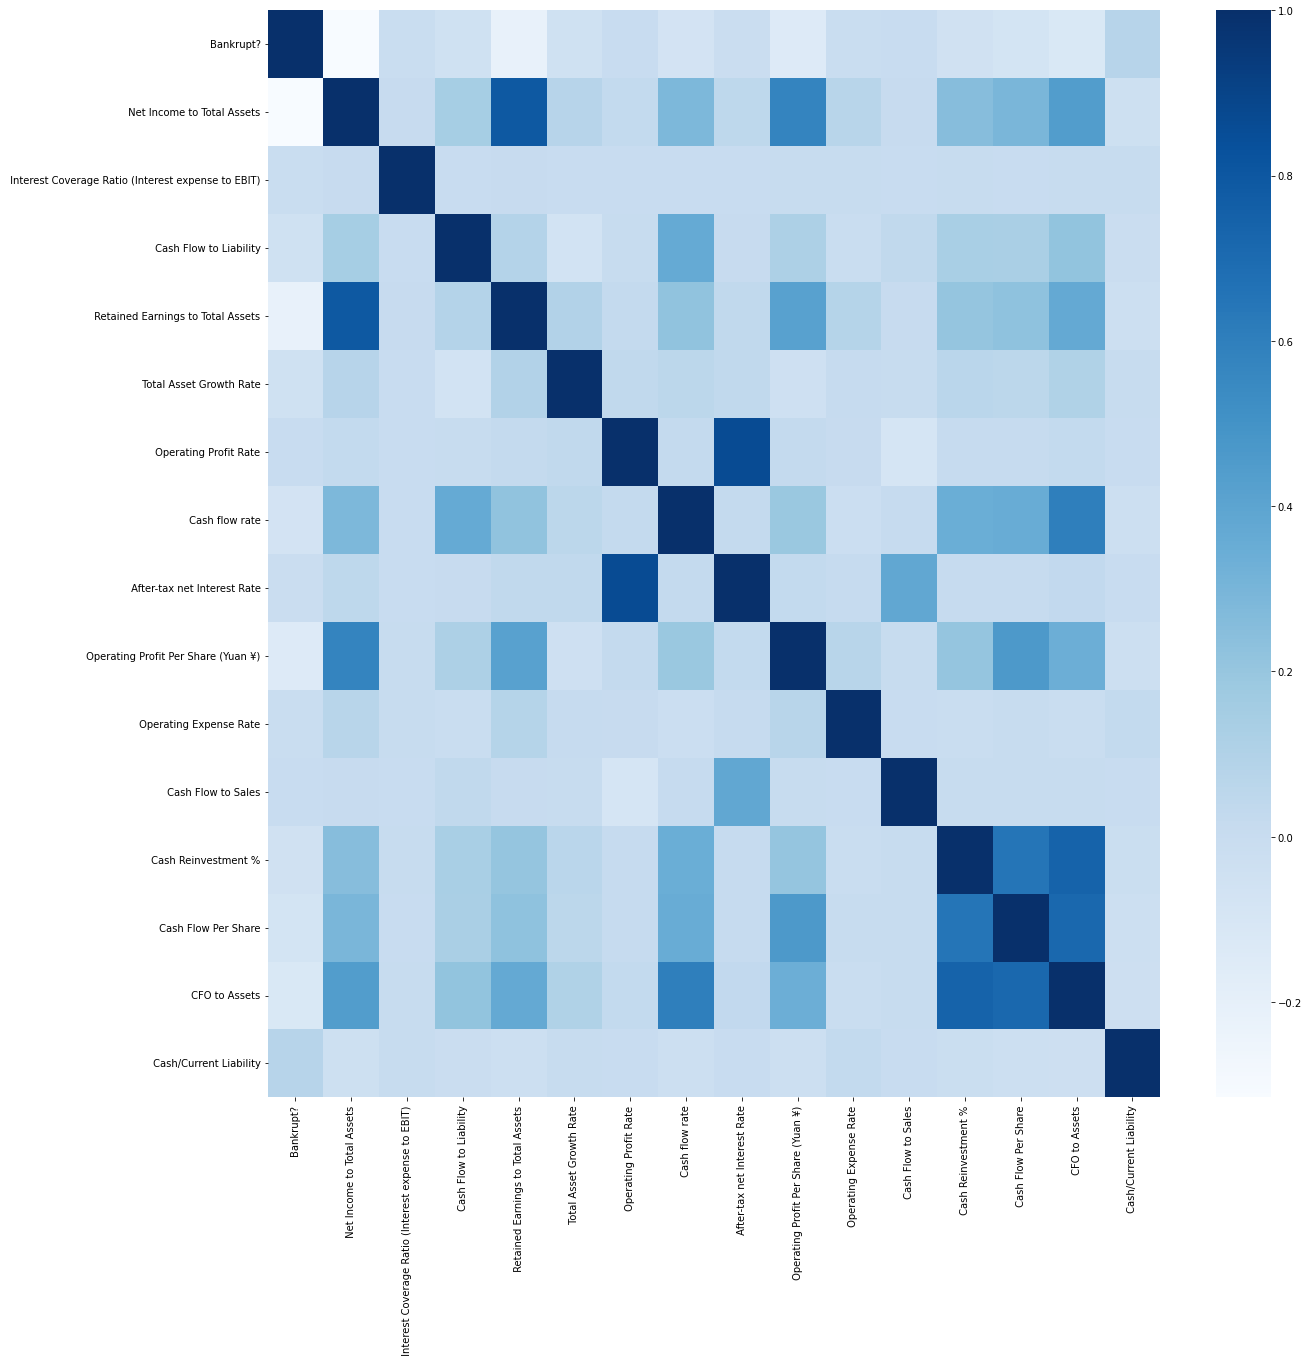

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap = "Blues")

construct density plot to observe relationship of interested variable with bankruptcy

Text(0.5, 1.0, 'Relationship between bankrupt events and Net income to total assets')

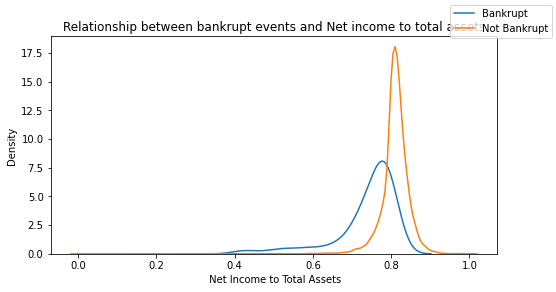

In [12]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Net Income to Total Assets'])
sns.kdeplot(df[df['Bankrupt?']==0][' Net Income to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Net income to total assets')


Text(0.5, 1.0, 'Relationship between bankrupt events and Retained Earnings to Total Assets')

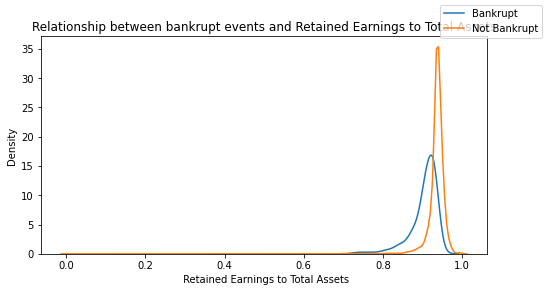

In [13]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Retained Earnings to Total Assets'])
sns.kdeplot(df[df['Bankrupt?']==0][' Retained Earnings to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Retained Earnings to Total Assets')

Text(0.5, 1.0, 'Relationship between bankrupt events and Total Asset Growth Rate')

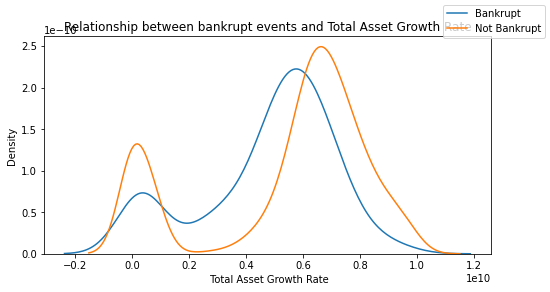

In [14]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Total Asset Growth Rate'])
sns.kdeplot(df[df['Bankrupt?']==0][' Total Asset Growth Rate'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total Asset Growth Rate')

In [15]:
X = df.drop(columns = "Bankrupt?")
Y = df["Bankrupt?"]

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (5114, 15)
y_train shape: (5114,)
X_test shape: (1705, 15)
y_test shape: (1705,)


In [17]:
X_train = stats.zscore(X_train)
X_test = stats.zscore(X_test)

Decision Tree

In [18]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,Y_train)
print(X_train_under.shape)

(318, 15)


In [19]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,Y_train)
print(X_train_over.shape)

(9910, 15)


In [20]:
acc_baseline = Y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9689


In [21]:

model_reg = tree.DecisionTreeClassifier(random_state=42)

model_reg.fit(X_train, Y_train)

model_under = tree.DecisionTreeClassifier(random_state=42)

model_under.fit(X_train_under, y_train_under)

model_over =  tree.DecisionTreeClassifier(random_state=42)

model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=42)

In [22]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,Y_train)
    acc_test = m.score(X_test,Y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9267
Training Accuracy: 0.7953
Test Accuracy: 0.8387
Training Accuracy: 1.0
Test Accuracy: 0.9584


Neither of the models beat the baseline but over sampling score is the highest


Feature importance of variables

<AxesSubplot:>

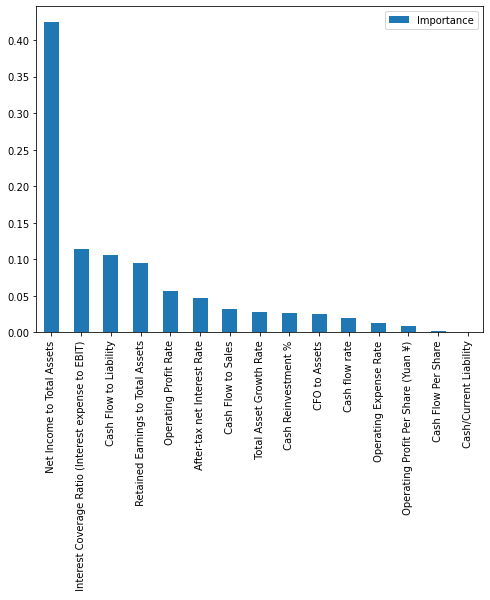

In [23]:
feat_importances = pd.DataFrame(model_over.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))


Confusion Matris of the decision tree

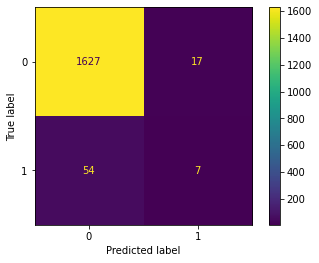

In [24]:
ConfusionMatrixDisplay.from_estimator(model_over, X_test,Y_test);


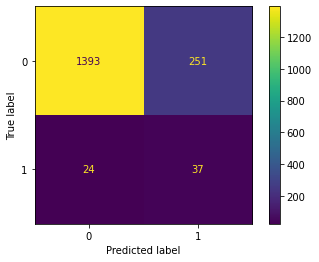

In [119]:
ConfusionMatrixDisplay.from_estimator(model_under, X_test,Y_test);


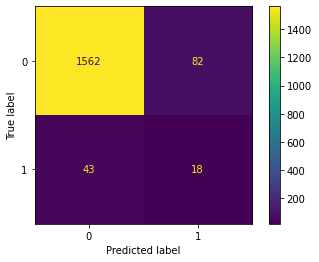

In [120]:
ConfusionMatrixDisplay.from_estimator(model_reg, X_test,Y_test);


## Random Forest

In [95]:
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.9642228739002933


<AxesSubplot:>

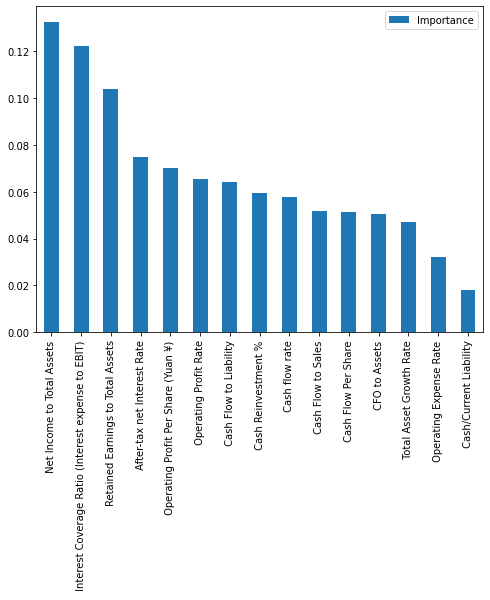

In [96]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

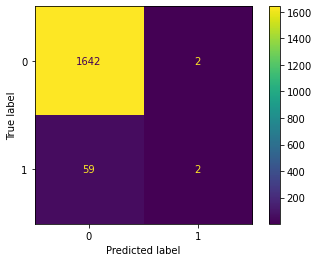

In [97]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [98]:
r2 = r2_score(Y_test,pred)
print('R2 for RF:', round(r2, 2))

R2 for RF: -0.04


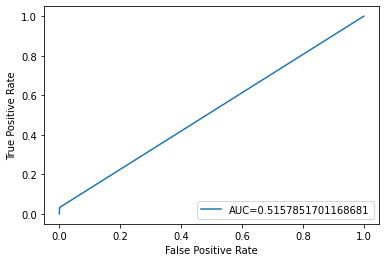

In [99]:
auc = metrics.roc_auc_score(Y_test,pred)
fpr, tpr, _ = metrics.roc_curve(Y_test,pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [100]:
log_loss= metrics.log_loss(Y_test,pred)
print('Log loss for Random Forest model is: ',log_loss)

Log loss for Random Forest model is:  1.2356990963544947


## KNN

In [121]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))


Train set Accuracy:  0.9755572937035588
Test set Accuracy:  0.9636363636363636


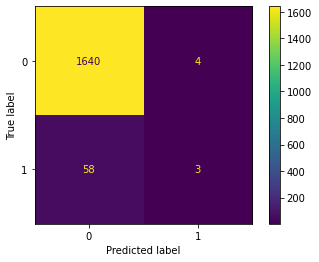

In [122]:
cm_display = ConfusionMatrixDisplay(cm).plot()

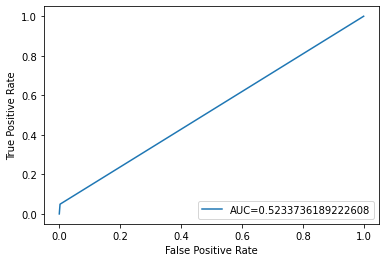

In [123]:
auc = metrics.roc_auc_score(Y_test,pred)
fpr, tpr, _ = metrics.roc_curve(Y_test,pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [103]:
log_loss= metrics.log_loss(Y_test,pred)
print('Log loss for KNN model is: ',log_loss)

Log loss for KNN model is:  1.2559573811578795


In [104]:
r2 = r2_score(Y_test,pred)
print('R2 for KNN:', round(r2, 2))

R2 for KNN: -0.05


## SVM

In [105]:
model =svm.SVC(kernel='linear', C=1, gamma='auto')
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

Train set Accuracy:  0.9689088775909269
Test set Accuracy:  0.9642228739002933


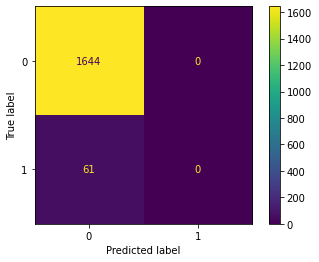

In [106]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [107]:
r2 = r2_score(Y_test,pred)
print('R2 for SVM.SVC:', round(r2, 2))

R2 for SVM.SVC: -0.04


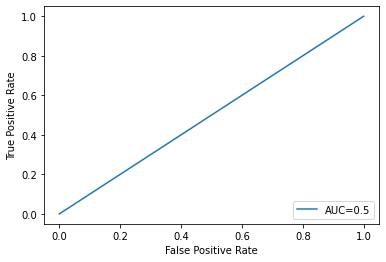

In [108]:
auc = metrics.roc_auc_score(Y_test,pred)
fpr, tpr, _ = metrics.roc_curve(Y_test,pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [109]:
log_loss= metrics.log_loss(Y_test,pred)
print('Log loss for SVM SVC model is: ',log_loss)

Log loss for SVM SVC model is:  1.235698158410295


Train set Accuracy:  0.9712553773953853
Test set Accuracy:  0.9642228739002933


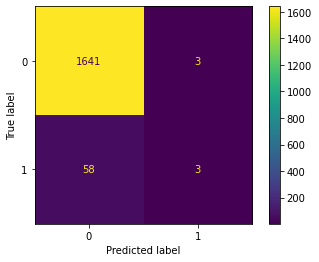

In [110]:
model =svm.LinearSVC(dual=False)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))
cm_display = ConfusionMatrixDisplay(cm).plot()

In [111]:
auc = metrics.roc_auc_score(Y_test,pred)

In [112]:
fpr, tpr, _ = metrics.roc_curve(Y_test,pred)


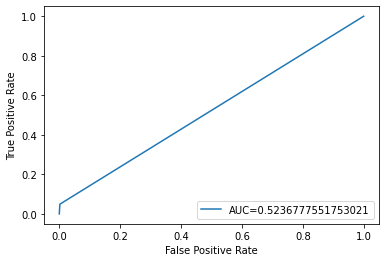

In [113]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

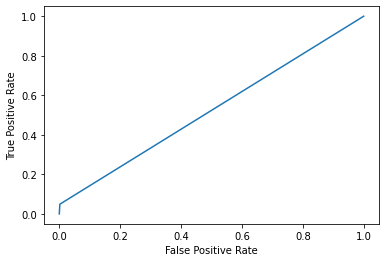

In [114]:
fpr, tpr, _ = metrics.roc_curve(Y_test,pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [115]:
log_loss= metrics.log_loss(Y_test,pred)
print('Log loss for SVM model is: ',log_loss)

Log loss for SVM model is:  1.2356995653265945


In [116]:
mae = mean_absolute_error(Y_test,pred)
print('Mean Absolute Error:', round(mae, 2))

Mean Absolute Error: 0.04


In [117]:
mse = mean_squared_error(Y_test,pred)
print('Mean Absolute Error:', round(mse, 2))

Mean Absolute Error: 0.04


In [118]:
r2 = r2_score(Y_test,pred)
print('R2 for SVM.LinearSVC:', round(r2, 2))

R2 for SVM.LinearSVC: -0.04
